# Credit Card Fraud Detection
> **Code:** Aman Taneja  
> **Batch:** June  
> **Domain:** Data Science  
> **Aim:** To build a machine learning model to identify fraudulent credit card transactions.

### Dataset Information
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
#Importing the neccesseray libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
print("All libraries successfully imported")

All libraries successfully imported


In [3]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

In [6]:
print("Number  of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

Number  of Rows 284807
Number of Columns 31


### Preprocessing the dataset

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Distribution of Legit tarnsactions and fraudulent transactions
df['Class'].value_counts()
#This dataset is highly unbalanced (0-Legit transcation, 1-Fradulent transaction)

Class
0    284315
1       492
Name: count, dtype: int64

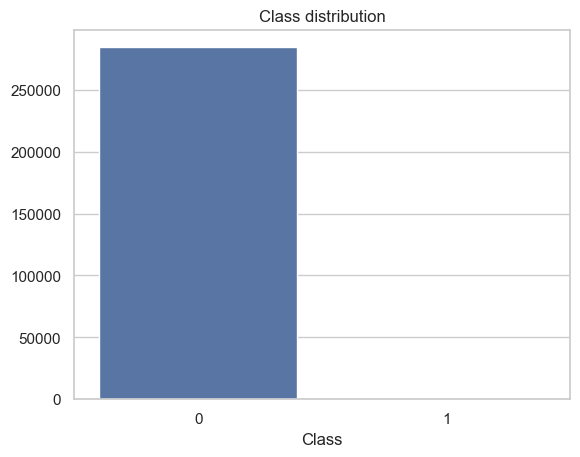

In [9]:
sns.set(style = 'whitegrid')

class_counts = df['Class'].value_counts()

sns.barplot(x= class_counts.index, y= class_counts.values)
plt.title('Class distribution')
plt.show()

In [10]:
#Separating the dataset for analysis
legit=df[df.Class==0]
fraud= df[df.Class == 1]

In [11]:
#Statistical Dsceription of the Legit dataset
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
#Statistical Dsceription of the Fraud dataset
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
#Compare the values for bot transaction
df.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Dealing with the Unbalanced data(284315 and 492): Undersampling

In [14]:
#Build a sample dataset containing similar distribution of Legit transactions and Fradulent transactions
#The number of fraudent transations is 492
legit_sample = legit.sample(n= 492)
#Concatenating/joining the two datasets
new_df = pd.concat([legit_sample, fraud], axis= 0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
195476,131078.0,-2.318505,2.249053,-0.426184,-0.286843,-0.635285,-0.911054,-0.130653,1.325185,-0.998950,...,0.000921,-0.526737,-0.240320,-0.094028,0.819024,-0.325552,-0.849877,-0.236880,16.78,0
69787,53581.0,1.209289,0.111022,0.465221,0.956745,-0.252440,-0.166900,-0.177832,-0.062958,0.300352,...,0.100739,0.309402,-0.218731,-0.436453,0.651161,-0.248932,0.040524,0.029007,35.00,0
251944,155579.0,-1.061884,1.464886,-0.779502,-0.779557,0.026040,-0.637267,0.222168,0.768212,-0.398833,...,-0.170383,-0.565639,0.131020,-0.493755,-0.351785,0.146399,-0.022283,0.006670,16.99,0
185189,126559.0,2.057016,-0.005183,-1.048614,0.413594,-0.085289,-1.200617,0.238405,-0.378101,0.429178,...,-0.278587,-0.638603,0.330109,0.066597,-0.275664,0.192629,-0.066420,-0.057797,4.49,0
207588,136744.0,-0.868208,-0.158921,1.624708,-3.016360,-1.079055,-0.749061,-0.136288,0.008061,-1.644969,...,-0.244935,-0.171571,-0.334373,-0.012245,0.675596,-0.112102,0.387880,0.171611,28.40,0


In [15]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [17]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,88120.126016,-0.010828,0.102029,0.002781,0.032395,0.000658,-0.070166,0.006527,0.003246,-0.027396,...,0.026877,0.015972,-0.028077,0.014986,-0.009219,0.041177,0.038676,0.009215,0.029578,82.205752
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
#Splitting the datset into features and Target
X=new_df.drop(columns='Class', axis= 1)
Y= new_df['Class']
print(X)
print(Y)

            Time        V1        V2        V3        V4        V5        V6  \
195476  131078.0 -2.318505  2.249053 -0.426184 -0.286843 -0.635285 -0.911054   
69787    53581.0  1.209289  0.111022  0.465221  0.956745 -0.252440 -0.166900   
251944  155579.0 -1.061884  1.464886 -0.779502 -0.779557  0.026040 -0.637267   
185189  126559.0  2.057016 -0.005183 -1.048614  0.413594 -0.085289 -1.200617   
207588  136744.0 -0.868208 -0.158921  1.624708 -3.016360 -1.079055 -0.749061   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [20]:
#Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state =2 )
print(X.shape, X_train.shape,X_test.shape)
print("\nSplitted successfully")

(984, 30) (787, 30) (197, 30)

Splitted successfully


In [21]:
#Logistic regression
model= LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

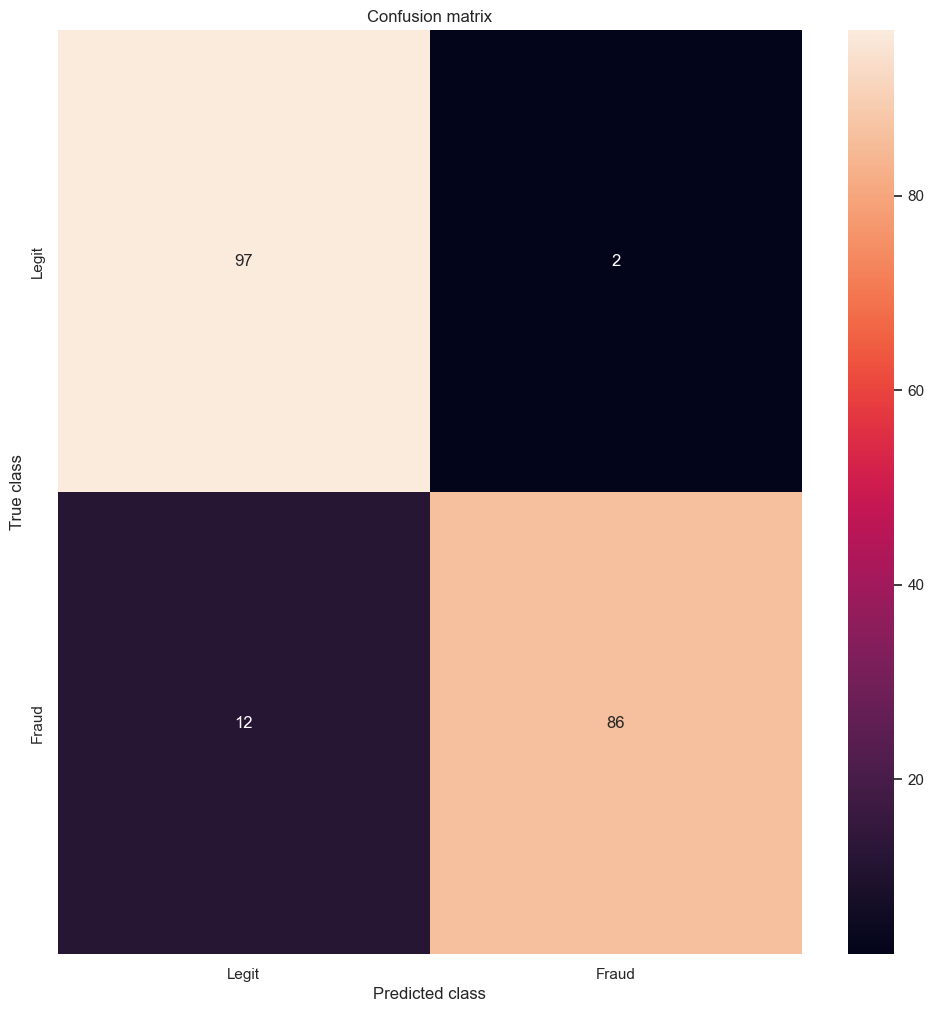

In [22]:
#visulalizing the confusion matrix
y_pred_log = model.predict(X_test)
LABELS = ['Legit', 'Fraud'] 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred_log) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

## Model Evaluation

In [23]:
#Accuracy score
#Accuracy on training data
X_train_prdiction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prdiction, Y_train)
print("Acurracy on training data is:",training_data_accuracy)

Acurracy on training data is: 0.9377382465057179


In [24]:
#Accuracy on test_data
X_test_prdiction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prdiction, Y_test)
print("Acurracy on training data is:",testing_data_accuracy)

Acurracy on training data is: 0.9289340101522843
